## **Problem Analysis Workshop 4**


### **Team Member Names and Student ID:**
Mandeep Singh Brar (8989367)        
Babandeep (9001552)     
Hasyashri Bhatt (9028501) 

### **How to run the code**     

   - **Step 1:** Install python to the system      
   - **Step 2:** Install a Code Editor or IDE (Visual Studio Code)      
   - **Step 3:** Install Anaconda (All-in-One) Optional     
   - **Step 4:** Setting Up the Project Folder Structure        
   - **Step 5:** Install Required Python Libraries      
   - **Step 6:** Writing and Testing the Python Code        
   - **Step 7:** Version Control with Git & GitHub      
   - **Step 8:** Following Coding Best Practices along with documentation       
   - **Step 9:** Keeping Everything Organized       

#### **Dataset: Global Fashion Retail Sales**

We have selected the dataset from the kaggle and its name is "Global fashion retail sales", This Dataset fulfill the sales report based on the stores.

Reference Link of the dataset : https://www.kaggle.com/datasets/ricgomes/global-fashion-retail-stores-dataset

This dataset contains comprehensive data about global fashion retail operations including:
  - Transactions
  - Products
  - Stores

It is well-suited for retail analytics and customer behavior segmentation using machine learning techniques such as clustering.

Expected Files:
  - transactions.csv
  - products.csv
  - stores.csv

**Field of Inquiry**        
Retail Store Analysis

**Research Question**       
What factors influence the global distribution of fashion retail stores?

**GenAI Prompt**        
"Analyze the Global Fashion Retail Stores Dataset to identify patterns in store locations, brand distribution, and regional trends. Highlight key insights that explain where and why fashion stores are located around the world."

**Short Essay Based on the Dataset**        
The Global Fashion Retail Stores Dataset includes information on over 40,000 fashion retail stores across multiple countries and continents. This dataset helps analyze where fashion brands are located globally and identify trends in store distribution.

Using this data, we can explore which countries and cities have the highest concentration of stores, what brands are most widespread, and how geography influences retail presence. This analysis is useful for fashion companies planning to expand, as well as for researchers studying international retail trends. It can also support decisions in marketing, logistics, and urban planning by showing how global fashion networks are structured.



In [ ]:
#Import Python Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display, Markdown
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

In [2]:
# Load Transactions Dataset
Transaction_Data = pd.read_csv('Data/transactions.csv')
print("Transaction Data Loaded Successfully")
print()
print("-" * 50)
print()

# Load Products Dataset
Products_Data = pd.read_csv('Data/products.csv')
print("Product Data Loaded Successfully")
print()
print("-" * 50)
print()

# Load Stores Dataset
Stores_Data = pd.read_csv('Data/stores.csv')
print("Stores Data Loaded Successfully")
print()

Transaction Data Loaded Successfully

--------------------------------------------------

Product Data Loaded Successfully

--------------------------------------------------

Stores Data Loaded Successfully



---

### **Preview of Datasets**

In [3]:
# Display the first 5 and last 5 rows of each dataset
transactions_preview = pd.concat([Transaction_Data.head(), Transaction_Data.tail()])
products_preview = pd.concat([Products_Data.head(), Products_Data.tail()])
stores_preview = pd.concat([Stores_Data.head(), Stores_Data.tail()])

# Display function with titles
def show_preview(title, df):
    display(Markdown(f"### {title}"))
    display(df)

# Show datasets
show_preview("**Transactions Dataset (First & Last 5 Rows)**", transactions_preview)
print("\n" + "-" * 50 + "\n")
show_preview("**Products Dataset (First & Last 5 Rows)**", products_preview)
print("\n" + "-" * 50 + "\n")
show_preview("**Stores Dataset (First & Last 5 Rows)**", stores_preview)



### **Transactions Dataset (First & Last 5 Rows)**

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total
0,INV-US-001-03781519,1,15973,13899,XXL,NaN,24.5,1,2024-09-13 17:12:00,0.45,13.48,1,6,USD,$,MASH13899-XXL-,Sale,Credit Card,35.75
1,INV-US-001-03792773,3,9222,12616,36,NaN,52.0,1,2024-10-05 13:25:00,0.00,52.00,1,5,USD,$,FEPA12616-36-,Sale,Credit Card,225.50
2,INV-US-001-03599989,1,47401,5914,L,NEUTRAL,96.5,3,2023-05-05 08:58:00,0.00,289.50,1,11,USD,$,MACO5914-L-NEUTRAL,Sale,Credit Card,335.50
3,INV-US-001-03636129,1,27702,7495,S,NaN,32.5,1,2023-09-08 16:31:00,0.45,17.88,1,7,USD,$,FESK7495-S-,Sale,Credit Card,17.88
4,RET-US-001-03856189,1,47481,14566,38,NaN,71.0,1,2025-01-31 00:00:00,0.00,-71.00,1,9,USD,$,FEPA14566-38-,Return,Credit Card,-71.00
174995,INV-PT-035-01483611,1,1641778,14539,S,NaN,28.0,1,2024-12-01 17:32:00,0.00,28.00,35,400,EUR,€,FET-14539-S-,Sale,Credit Card,28.00
174996,INV-PT-035-01468517,2,1565073,11106,M,NaN,47.0,1,2024-05-27 09:30:00,0.00,47.00,35,403,EUR,€,FESH11106-M-,Sale,Credit Card,122.50
174997,INV-PT-035-01496619,1,1642638,16958,40,NaN,36.0,3,2025-03-10 20:06:00,0.00,108.00,35,400,EUR,€,FEPA16958-40-,Sale,Credit Card,108.00
174998,INV-PT-035-01492211,1,1635032,12613,M,WHITE,52.0,1,2024-12-31 10:07:00,0.50,26.00,35,402,EUR,€,FEDR12613-M-WHITE,Sale,Credit Card,83.75
174999,INV-PT-035-01465420,1,1636400,11657,S,NaN,55.5,1,2024-04-21 20:01:00,0.00,55.50,35,404,EUR,€,FESP11657-S-,Sale,Credit Card,55.50



--------------------------------------------------



### **Products Dataset (First & Last 5 Rows)**

,Product ID,Category,Sub Category,Description PT,Description DE,Description FR,Description ES,Description EN,Description ZH,Color,Sizes,Production Cost
0,1,Feminine,Coats and Blazers,Esportivo Veludo Verde Com Botões,Sport Samt Sport Mit Knöpfen,Sports Velvet Sports Avec Des Boutons,Deportes De Terciopelo Con Botones,Sports Velvet Sports With Buttons,运动天鹅绒运动与按钮,NaN,S|M|L|XL,10.73
1,2,Feminine,Sweaters and Knitwear,Luxuoso Denim Rosa Com Botões,Luxuriöser Rosa Jeans Mit Knöpfen,Léchard De Denim Rose Avec Boutons,Denim Rosa Lujoso Con Botones,Luxurious Pink Denim With Buttons,豪华的粉红色牛仔布和纽扣,PINK,S|M|L|XL,19.55
2,3,Feminine,Dresses and Jumpsuits,Retrô Tricot Preto Estampado,Black Tricot Gedruckter Tricot,Tricot Imprimé En Tricot Noir,Tricot Negro Tricot Impreso,Black Tricot Printed Tricot,黑色三角形印刷三角形,BLACK,S|M|L|XL,25.59
3,4,Feminine,Shirts and Blouses,Blusa De Algodão Básica,Basis -Baumwollbluse,Chemisier En Coton De Base,Blusa De Algodón,Basic Cotton Blouse,基本的棉衬衫,NaN,S|M|L|XL,27.62
4,5,Feminine,T-shirts and Tops,T-Shirt Básica De Algodão,Basis-Baumwoll-T-Shirt,T-Shirt En Coton De Base,Camiseta Básica De Algodón,Basic Cotton T-Shirt,基本棉T恤,NaN,S|M|L,11.69
17935,17936,Children,"Girl and Boy (1-5 years, 6-14 years)",Executivo Camurça Verde Com Zíper,Executive Green Wildleder Mit Reißverschluss,Executive Green Suede Avec Zipper,Gamuza Verde Ejecutiva Con Cremallera,Executive Green Suede With Zipper,行政绿革与拉链,GREEN,P|M|G|GG,7.69
17936,17937,Children,Coats,Luxuoso Lã Turquesa Com Capuz,Luxuriöse Türkiswolle Mit Kapuze,Luxueuse Laine Turquoise Avec Capuche,Lujosa Lana Turquesa Con Capucha,Luxurious Turquoise Wool With Hood,豪华的绿松石羊毛和引擎盖,TURQUOISE,P|M|G,11.65
17937,17938,Children,Sweaters,Camisola Infantil De Tricô Com Estampa Geométrica,Kidskot -Shirt Mit Geometrischem Druck,Chemise Kidskot Avec Imprimé Géométrique,Camisa De Kidskot Con Estampado Geométrico,Kidskot Shirt With Geometric Print,带几何印刷的Kidskot衬衫,NaN,P|M|G,24.38
17938,17939,Children,Pajamas,Pijama Infantil De Cetim Com Brilho Suave E Bo...,Kinder Satin -Pyjama Mit Glattem Glanz Und Tasche,Pyjama En Satin Pour Enfants Avec Une Brillanc...,Pajama De Satén Para Niños Con Brillo Suave Y ...,Kids Satin Pajama With Smooth Shine And Pocket,孩子们缎面睡衣，光滑的光泽和口袋,NaN,P|M|G,18.27
17939,17940,Children,Accessories,Protetor De Braço Infantil Para Segurança,Kinderarmschutz Für Sicherheit,Protecteur Du Bras Pour Enfants Pour La Sécurité,Protector Del Brazo Infantil Por Seguridad,Children'S Arm Protector For Safety,为了安全起见儿童手臂保护器,NaN,NaN,10.99



--------------------------------------------------



### **Stores Dataset (First & Last 5 Rows)**

,Store ID,Country,City,Store Name,Number of Employees,ZIP Code,Latitude,Longitude
0,1,United States,New York,Store New York,10,10001,40.7128,-74.0060
1,2,United States,Los Angeles,Store Los Angeles,8,90001,34.0522,-118.2437
2,3,United States,Chicago,Store Chicago,9,60601,41.8781,-87.6298
3,4,United States,Houston,Store Houston,10,77001,29.7604,-95.3698
4,5,United States,Phoenix,Store Phoenix,9,85001,33.4484,-112.0740
30,31,Portugal,Lisboa,Store Lisboa,10,1000-001,38.7167,-9.1333
31,32,Portugal,Porto,Store Porto,7,4000-001,41.1496,-8.6110
32,33,Portugal,Braga,Store Braga,9,4700-001,41.5503,-8.4201
33,34,Portugal,Guimarães,Store Guimarães,9,4800-001,41.4444,-8.2962
34,35,Portugal,Coimbra,Store Coimbra,7,3000-001,40.2056,-8.4196


### **Data Cleaning and Merging Dataset**

In [4]:
# Check for missing values and data types in each dataset
missing_products = Products_Data.isnull().sum()
missing_stores = Stores_Data.isnull().sum()
missing_transactions = Transaction_Data.isnull().sum()

print("Missing Values in Products Dataset:")
print("-" * 50)
print(missing_products)
print()
print("Missing Values in Stores Dataset:")
print("-" * 50)
print(missing_stores)
print()
print("Missing Values in Transactions Dataset:")
print("-" * 50)
print(missing_transactions) 



Missing Values in Products Dataset:
--------------------------------------------------
Product ID             0
Category               0
Sub Category           0
Description PT         0
Description DE         0
Description FR         0
Description ES         0
Description EN         0
Description ZH         0
Color              12445
Sizes               2070
Production Cost        0
dtype: int64

Missing Values in Stores Dataset:
--------------------------------------------------
Store ID               0
Country                0
City                   0
Store Name             0
Number of Employees    0
ZIP Code               0
Latitude               0
Longitude              0
dtype: int64

Missing Values in Transactions Dataset:
--------------------------------------------------
Invoice ID               0
Line                     0
Customer ID              0
Product ID               0
Size                 11218
Color               119092
Unit Price               0
Quantity            

#### **Stores Dataset:**
No missing values, so no changes needed

In [5]:
# Clean `Products_Data`
# Fill missing 'Color' and 'Sizes' with 'Unknown' safely
Products_Data['Color'] = Products_Data['Color'].fillna('Unknown')
Products_Data['Sizes'] = Products_Data['Sizes'].fillna('Unknown')

# Clean `Transaction_Data`
# Fill missing 'Size' and 'Color' with 'Unknown' safely
Transaction_Data['Size'] = Transaction_Data['Size'].fillna('Unknown')
Transaction_Data['Color'] = Transaction_Data['Color'].fillna('Unknown')

# Convert 'Date' to datetime format
Transaction_Data['Date'] = pd.to_datetime(Transaction_Data['Date'])


In [6]:
# Display missing values post-cleaning and sample rows
cleaning_results = {
    "Missing Values After Cleaning": {
        "products": Products_Data.isnull().sum().to_dict(),
        "stores": Stores_Data.isnull().sum().to_dict(),
        "transactions": Transaction_Data.isnull().sum().to_dict()
    }
}

cleaning_results

{'Missing Values After Cleaning': {'products': {'Product ID': 0,
   'Category': 0,
   'Sub Category': 0,
   'Description PT': 0,
   'Description DE': 0,
   'Description FR': 0,
   'Description ES': 0,
   'Description EN': 0,
   'Description ZH': 0,
   'Color': 0,
   'Sizes': 0,
   'Production Cost': 0},
  'stores': {'Store ID': 0,
   'Country': 0,
   'City': 0,
   'Store Name': 0,
   'Number of Employees': 0,
   'ZIP Code': 0,
   'Latitude': 0,
   'Longitude': 0},
  'transactions': {'Invoice ID': 0,
   'Line': 0,
   'Customer ID': 0,
   'Product ID': 0,
   'Size': 0,
   'Color': 0,
   'Unit Price': 0,
   'Quantity': 0,
   'Date': 0,
   'Discount': 0,
   'Line Total': 0,
   'Store ID': 0,
   'Employee ID': 0,
   'Currency': 0,
   'Currency Symbol': 0,
   'SKU': 0,
   'Transaction Type': 0,
   'Payment Method': 0,
   'Invoice Total': 0}}}

#### **Merge the Dataset**



In [7]:
# Step 1: Merge transactions with products on 'Product ID'
merged_df = Transaction_Data.merge(Products_Data, on='Product ID', how='left')

# Step 2: Merge the result with stores on 'Store ID'
merged_df = merged_df.merge(Stores_Data, on='Store ID', how='left')

# Step 3: Display merged data information and preview
merged_info = merged_df.info()
merged_preview = merged_df.head()

(merged_info, merged_preview)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Invoice ID           175000 non-null  object        
 1   Line                 175000 non-null  int64         
 2   Customer ID          175000 non-null  int64         
 3   Product ID           175000 non-null  int64         
 4   Size                 175000 non-null  object        
 5   Color_x              175000 non-null  object        
 6   Unit Price           175000 non-null  float64       
 7   Quantity             175000 non-null  int64         
 8   Date                 175000 non-null  datetime64[ns]
 9   Discount             175000 non-null  float64       
 10  Line Total           175000 non-null  float64       
 11  Store ID             175000 non-null  int64         
 12  Employee ID          175000 non-null  int64         
 13  Currency      

(None,
             Invoice ID  Line  Customer ID  Product ID Size  Color_x  \
 0  INV-US-001-03781519     1        15973       13899  XXL  Unknown   
 1  INV-US-001-03792773     3         9222       12616   36  Unknown   
 2  INV-US-001-03599989     1        47401        5914    L  NEUTRAL   
 3  INV-US-001-03636129     1        27702        7495    S  Unknown   
 4  RET-US-001-03856189     1        47481       14566   38  Unknown   
 
    Unit Price  Quantity                Date  Discount  ...  Color_y  \
 0        24.5         1 2024-09-13 17:12:00      0.45  ...  Unknown   
 1        52.0         1 2024-10-05 13:25:00      0.00  ...  Unknown   
 2        96.5         3 2023-05-05 08:58:00      0.00  ...  NEUTRAL   
 3        32.5         1 2023-09-08 16:31:00      0.45  ...  Unknown   
 4        71.0         1 2025-01-31 00:00:00      0.00  ...  Unknown   
 
                Sizes  Production Cost        Country      City  \
 0         M|L|XL|XXL             7.16  United States  New

### **Clustering in the Term Project**

Clustering is valuable for grouping similar customer transactions based on purchase behavior, product categories, or store performance. In this project, it helps identify purchasing patterns, customer segments, or underperforming stores. These insights support targeted marketing strategies, inventory optimization, and improved customer service through data-driven decisions.


#### **K-Means Algorithm**

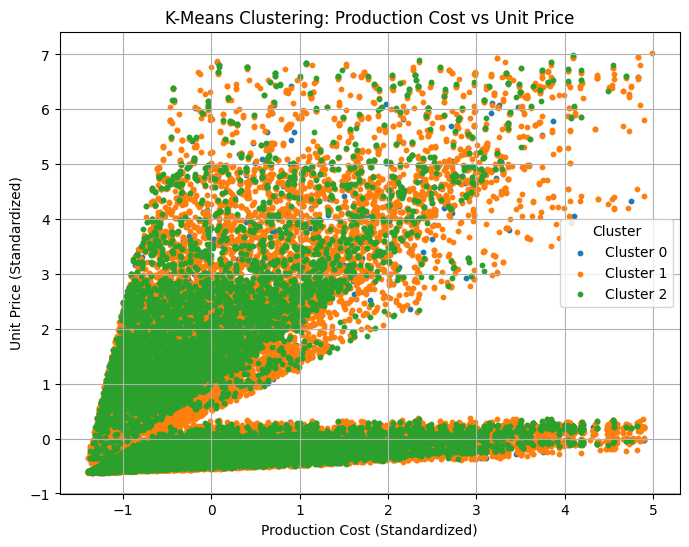

In [8]:
# Select product-related features for clustering
cluster_features = merged_df[['Production Cost', 'Unit Price', 'Discount', 'Quantity']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_features)

# Apply KMeans algorithm
kmeans_model = KMeans(n_clusters=3, random_state=42)
merged_df['ProductCluster'] = kmeans_model.fit_predict(scaled_data)

# Plot the clusters with a legend
plt.figure(figsize=(8, 6))
for cluster_id in sorted(merged_df['ProductCluster'].unique()):
    cluster_points = scaled_data[merged_df['ProductCluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, label=f'Cluster {cluster_id}')

plt.title("K-Means Clustering: Production Cost vs Unit Price")
plt.xlabel("Production Cost (Standardized)")
plt.ylabel("Unit Price (Standardized)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

**Interpretation**

This K-Means clustering groups transactions based on four product-related features: **Production Cost**, **Unit Price**, **Discount**, and **Quantity**. Each cluster represents a distinct purchasing or product pricing pattern:

- **Cluster 0** may reflect low-cost, low-quantity items—often discounted or bulk-sold.
- **Cluster 1** likely represents standard-priced products with moderate quantities and discount behavior.
- **Cluster 2** may contain premium-priced or high-cost items, typically with lower quantity but minimal discounting.

The visualization shows how products differ in pricing and sales dynamics, supporting pricing strategy, product segmentation, and inventory optimization.


### **K-Means Clustering Summary**

The K-Means algorithm grouped transactions into three clusters using Production Cost, Unit Price, Discount, and Quantity. The clusters reveal distinct pricing and purchasing patterns, such as high-volume low-cost items or premium-priced products. These insights support strategic decisions in pricing, product segmentation, and inventory management.


### **Performs additional exploration and validation by:**

#### **Step 1: Converting factor variables to numeric**

In many real-world datasets, we encounter categorical (also called factor) variables such as "Country", "Payment Method", or "Category". These are non-numeric labels, but most machine learning models (like clustering or regression algorithms) require numeric input. To make these features usable, we transform them into a numerical format through Label Encoding.

Label encoding assigns a unique integer to each distinct category in a column. It’s a quick and memory-efficient way to convert categorical data for models that do not rely on ordinal relationships.

**Identify Factor Variables:**

In [9]:
merged_df.select_dtypes(include='object').columns

Index(['Invoice ID', 'Size', 'Color_x', 'Currency', 'Currency Symbol', 'SKU',
       'Transaction Type', 'Payment Method', 'Category', 'Sub Category',
       'Description PT', 'Description DE', 'Description FR', 'Description ES',
       'Description EN', 'Description ZH', 'Color_y', 'Sizes', 'Country',
       'City', 'Store Name', 'ZIP Code'],
      dtype='object')

In [10]:
# Make a copy of the datasets to preserve originals
products = Products_Data.copy()
stores = Stores_Data.copy()
transactions = Transaction_Data.copy()

# Define a reusable function to apply Label Encoding
def encode_factor_variables(df, columns):
    encoder = LabelEncoder()
    for col in columns:
        df[col + '_Encoded'] = encoder.fit_transform(df[col].astype(str))
    return df

# Apply the function to selected factor variables

# Products dataset
products = encode_factor_variables(products, ['Category', 'Sub Category'])

# Stores dataset
stores = encode_factor_variables(stores, ['Country', 'City', 'Store Name'])

# Transactions dataset
transactions = encode_factor_variables(transactions, ['Transaction Type', 'Payment Method', 'Currency'])

# Preview encoded columns
print("Encoded from Products:")
print(products[['Category', 'Category_Encoded', 'Sub Category', 'Sub Category_Encoded']].head())

print("\nEncoded from Stores:")
print(stores[['Country', 'Country_Encoded', 'City', 'City_Encoded']].head())

print("\nEncoded from Transactions:")
print(transactions[['Transaction Type', 'Transaction Type_Encoded', 'Payment Method', 'Payment Method_Encoded']].head())

Encoded from Products:
   Category  Category_Encoded           Sub Category  Sub Category_Encoded
0  Feminine                 1      Coats and Blazers                     3
1  Feminine                 1  Sweaters and Knitwear                    16
2  Feminine                 1  Dresses and Jumpsuits                     4
3  Feminine                 1     Shirts and Blouses                    10
4  Feminine                 1      T-shirts and Tops                    19

Encoded from Stores:
         Country  Country_Encoded         City  City_Encoded
0  United States                5     New York            21
1  United States                5  Los Angeles            16
2  United States                5      Chicago             5
3  United States                5      Houston            11
4  United States                5      Phoenix            24

Encoded from Transactions:
  Transaction Type  Transaction Type_Encoded Payment Method  \
0             Sale                         1    

**Outcome:** 

You will now see new columns like Category_Encoded, Country_Encoded, and Payment Method_Encoded in your dataset. These numerical representations are suitable for modeling and can be used in clustering, regression, or classification tasks.

#### **Step 2: Converting Calendar Dates to Julian Format**

Date columns often contain detailed timestamp information (year, month, day, hour, etc.). While rich in context, this format can be overly complex for certain modeling tasks or seasonal trend analysis.

In [ ]:
# Ensure the 'Date' column is in datetime format
transactions['Date'] = pd.to_datetime(transactions['Date'], errors='coerce')

# Create a new column for Julian Day (day of the year)
transactions['Julian_Date'] = transactions['Date'].dt.strftime('%j').astype(int)

# Display a few rows to confirm
print("Calendar to Julian Date Conversion:")
print(transactions[['Date', 'Julian_Date']].head())

📅 Calendar to Julian Date Conversion:
                 Date  Julian_Date
0 2024-09-13 17:12:00          257
1 2024-10-05 13:25:00          279
2 2023-05-05 08:58:00          125
3 2023-09-08 16:31:00          251
4 2025-01-31 00:00:00           31


**Outcome:**        
A new column Julian_Date is now part of your transactions dataset.

#### **Step 3: Converting Categorical Values to Dummies**       

Categorical columns contain values like "Sale", "Return", "Credit Card", or "Cash". These labels can’t be directly used in most machine learning models. So, we convert them into dummy variables — a process known as one-hot encoding.

In [ ]:
# Select categorical columns to encode
categorical_cols = ['Transaction Type', 'Payment Method']

# Apply one-hot encoding using pandas
transaction_dummies = pd.get_dummies(transactions[categorical_cols], 
                                      prefix=categorical_cols, 
                                      drop_first=False)

# Join the encoded columns back to the main DataFrame
transactions = pd.concat([transactions, transaction_dummies], axis=1)

# Display the first few rows of encoded variables
print("One-Hot Encoded Columns:")
print(transaction_dummies.head())


🧾 Sample One-Hot Encoded Columns:
   Transaction Type_Return  Transaction Type_Sale  Payment Method_Cash  \
0                    False                   True                False   
1                    False                   True                False   
2                    False                   True                False   
3                    False                   True                False   
4                     True                  False                False   

   Payment Method_Credit Card  
0                        True  
1                        True  
2                        True  
3                        True  
4                        True  


#### **Step 4: Applying Box-Cox Transformation to Normalize Skewed Data**

This skew can negatively affect machine learning models, especially those that assume normality (like linear regression or clustering). The Box-Cox transformation helps normalize these skewed features by applying a power transformation, improving the performance and interpretability of such models.

In [18]:
from scipy.stats import boxcox

# Columns we want to transform
numeric_cols = ['Unit Price', 'Quantity', 'Line Total', 'Invoice Total']

# Store lambda values and created column names
boxcox_lambdas = {}
created_columns = []

# Apply Box-Cox only to strictly positive columns
for col in numeric_cols:
    if (Transaction_Data[col] > 0).all():
        transformed, fitted_lambda = boxcox(Transaction_Data[col])
        new_col_name = col + '_BoxCox'
        Transaction_Data[new_col_name] = transformed
        boxcox_lambdas[col] = round(fitted_lambda, 3)
        created_columns.append(new_col_name)
    else:
        print(f"Skipping '{col}' — contains non-positive values.")

# Show lambda values
print("\nBox-Cox Lambda Parameters (for transformed columns):")
for col, lam in boxcox_lambdas.items():
    print(f"{col}: λ = {lam}")

# Safely preview only the columns that were created
Transaction_Data[created_columns].head()

Skipping 'Line Total' — contains non-positive values.
Skipping 'Invoice Total' — contains non-positive values.

Box-Cox Lambda Parameters (for transformed columns):
Unit Price: λ = -0.316
Quantity: λ = -16.5


,Unit Price_BoxCox,Quantity_BoxCox
0,2.013130,0.000000
1,2.256971,0.000000
2,2.418180,0.060608
3,2.111541,0.000000
4,2.342103,0.000000


**Outcome:**        
- Box-Cox skips any column with 0 or negative numbers.

- Now the script skips those safely and shows a message.

- You’ll only see transformed results for valid columns.

#### **Step 5: Applying Tukey’s Ladder**        

While Box-Cox is powerful for normalizing data, it has a key limitation — it only works on strictly positive values. This means it cannot handle data with zeros or negative numbers.

Tukey’s Ladder of Powers (implemented as the Yeo-Johnson transformation in sklearn) is a more flexible alternative. It works with:

- Positive values 

- Zero values 

- Negative values 

In [ ]:
# Step 1: Select numeric columns for transformation
numeric_cols = ['Unit Price', 'Quantity', 'Line Total', 'Invoice Total']

# Step 2: Initialize Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Step 3: Apply transformation
transformed_data = pt.fit_transform(Transaction_Data[numeric_cols])

# Step 4: Convert to DataFrame with new column names
tukey_df = pd.DataFrame(transformed_data, columns=[col + '_Tukey' for col in numeric_cols])

# Step 5: Concatenate back to original DataFrame
transactions_df = pd.concat([Transaction_Data, tukey_df], axis=1)

# Step 6: Preview transformed data
print("Tukey Transformed Data:")
print(transactions_df[[col + '_Tukey' for col in numeric_cols]].head())

Tukey Transformed Data:
   Unit Price_Tukey  Quantity_Tukey  Line Total_Tukey  Invoice Total_Tukey
0          1.931060        0.037165         12.216125            31.537479
1          2.136966        0.037165         44.297553           183.468699
2          2.272291        0.037165        226.119889           268.068943
3          2.014125        0.037165         16.007664            16.219879
4          2.208613        0.037165        -84.805698           -83.011868


**Summary**

We have new columns like:
- Unit Price_Tukey
- Quantity_Tukey
- Line Total_Tukey
- Invoice Total_Tukey

These are normalized, more symmetric, and ready for machine learning or clustering.

### **Transformation Summary**

We transformed categorical features using label encoding and one-hot encoding. Dates were converted to Julian format to capture seasonality. Numerical columns were normalized using Box-Cox (for positive values) and Yeo-Johnson (for all values). These transformations enhanced the dataset’s structure, enabling better performance in machine learning and statistical analysis.
